### 002916 深南电路

##### 加权平均净资产收益率
| 2019 | 2018 | 2017 |
| ---- | ---- | ---- |
| 29.11% | 20.38% | 25.61% |

###### 2020-11-09
* 2020Q3收入同比+7%，增速下滑


In [1]:
ticker = '002916'

In [2]:
%%html
<style>
table {float:left}
</style>

In [3]:
%load_ext autoreload
%autoreload 2

import os
import sys
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append(os.path.join(os.path.expanduser('~'), 'GitHub', 'stock'))
import script.data as data
import script.utils as utils

In [4]:
income = data.get_IS(ticker)
incomeq = data.get_ISQ(ticker)
mkt = data.get_market(ticker)
bs = data.get_BS(ticker)

In [5]:
change = utils.column_pct(income[['营业总收入', '营业总成本', '归属于母公司所有者的净利润']], periods=-1)
income_change = pd.concat([income[['截止日期', '基本每股收益', '稀释每股收益']], change], axis=1)
income_change.set_index('截止日期')

,基本每股收益,稀释每股收益,营业总收入,营业总成本,归属于母公司所有者的净利润
截止日期,,,,,
2019-12-31,3.66,3.65,"10,524,196,883 (38.4%)","9,122,601,234 (34.1%)","1,232,775,470 (76.8%)"
2018-12-31,2.08,2.08,"7,602,141,701 (33.7%)","6,801,760,389 (29.4%)","697,252,358 (55.6%)"
2017-12-31,2.13,2.13,"5,686,939,441 (23.7%)","5,257,390,181 (21.1%)","448,082,267 (63.4%)"
2016-12-31,1.31,1.31,"4,598,502,247 (30.7%)","4,340,731,563 (26.8%)","274,164,178 (69.6%)"
2015-12-31,0.77,0.77,"3,518,673,108 (-3.3%)","3,421,941,791 (-1.3%)","161,692,927 (-15.2%)"
2014-12-31,0.91,0.91,"3,638,027,450 (nan%)","3,468,632,037 (nan%)","190,724,905 (nan%)"


In [6]:
change = utils.column_pct(incomeq[['营业收入', '归属于母公司所有者的净利润']], periods=-4)
incomeq_change = pd.concat([incomeq[['截止日期']], change], axis=1)
incomeq_change[:24].set_index('截止日期')

,营业收入,归属于母公司所有者的净利润
截止日期,,
2020-06-30,"3,417,896,430 (30.0%)","447,537,774 (57.4%)"
2020-03-31,"2,497,505,738 (15.5%)","276,780,418 (48.2%)"
2019-12-31,"2,866,144,800 (26.5%)","365,403,606 (62.9%)"
2019-09-30,"2,866,510,015 (36.7%)","396,329,110 (105.8%)"
2019-06-30,"2,628,671,123 (49.2%)","284,274,433 (74.1%)"
2019-03-31,"2,162,870,946 (46.4%)","186,768,322 (59.5%)"
2018-12-31,"2,265,337,614 (53.8%)","224,323,540 (105.3%)"
2018-09-30,"2,097,046,725 (41.2%)","192,574,908 (121.5%)"
2018-06-30,"1,762,284,077 (22.2%)","163,288,941 (8.7%)"


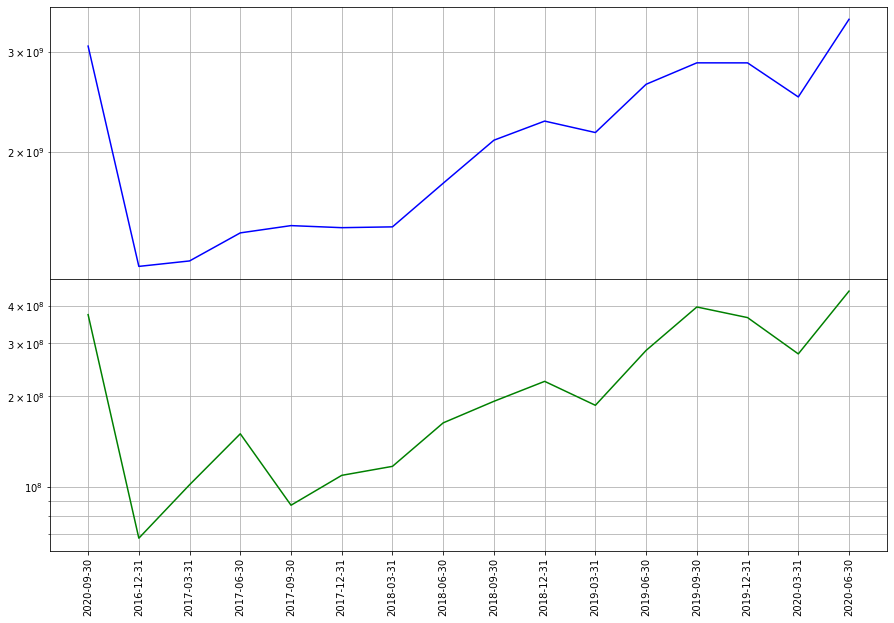

In [7]:
plt.figure(figsize=(15,10))
ax = plt.subplot(211)
plt.plot(incomeq['截止日期'][::-1], incomeq['营业收入'][::-1], 'b-')
ax.set_yscale("log")
ax.grid(True, which='both', axis='both')
ax = plt.subplot(212)
plt.plot(incomeq['截止日期'][::-1], incomeq['归属于母公司所有者的净利润'][::-1], 'g-')
ax.set_yscale("log")
ax.grid(True, which='both', axis='both')
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=.0)
plt.show()

In [8]:
income['毛利率'] = (1 - income['营业成本'] / income['营业收入']).round(3) * 100
income['净利率'] = (income['净利润'] / income['营业总收入']).round(3) * 100
income.set_index('截止日期')[['毛利率', '净利率']]

,毛利率,净利率
截止日期,,
2019-12-31,26.5,11.7
2018-12-31,23.1,9.2
2017-12-31,22.4,7.9
2016-12-31,20.5,6.0
2015-12-31,20.6,4.5
2014-12-31,21.7,5.1


In [9]:
change = utils.column_pct(bs[['存货', '应付账款', '应收账款']], periods=-1)
bs_change = pd.concat([bs[['截止日期']], change], axis=1)
bs_change.set_index('截止日期', inplace=True)
change = utils.column_pct(income[['营业收入']], periods=-1)
income_change = pd.concat([income[['截止日期']], change], axis=1)
income_change.set_index('截止日期', inplace=True)
pd.concat([income_change, bs_change], axis=1)

,营业收入,存货,应付账款,应收账款
截止日期,,,,
2019-12-31,"10,524,196,883 (38.4%)","1,504,293,117 (13.3%)","1,555,477,944 (22.1%)","2,091,660,220 (32.7%)"
2018-12-31,"7,602,141,701 (33.7%)","1,327,301,116 (26.8%)","1,273,691,527 (44.6%)","1,576,514,663 (88.1%)"
2017-12-31,"5,686,939,441 (23.7%)","1,047,056,854 (32.1%)","880,767,802 (45.4%)","838,018,751 (14.8%)"
2016-12-31,"4,598,502,247 (30.7%)","792,400,107 (33.4%)","605,855,577 (22.1%)","730,009,437 (10.0%)"
2015-12-31,"3,518,673,108 (-3.3%)","593,879,333 (-7.4%)","496,274,620 (13.3%)","663,482,281 (-4.2%)"
2014-12-31,"3,638,027,450 (nan%)","641,463,032 (nan%)","438,078,435 (nan%)","692,530,995 (nan%)"


In [10]:
mkt['前复权'] = mkt['收盘价'] * mkt['累积前复权因子']
mkt['前复权'] = mkt['前复权'].round(2)
mkt['滚动市盈率'] = mkt['滚动市盈率'].round(1)
df = mkt[['收盘价', '滚动市盈率', '前复权']].groupby(mkt['交易日期'].dt.year).agg(['min', 'max', 'first', 'last'])[-10:]
df['前复权增长'] = df['前复权'][['first', 'last']].apply(lambda x: round((x[1]-x[0])/x[0] * 100,1), axis=1)
df.drop(columns=[('收盘价', 'min'), ('收盘价', 'max'), ('前复权', 'min'), ('前复权', 'max'), ('滚动市盈率', 'first'), ('滚动市盈率', 'last')])

收盘价         滚动市盈率           前复权          前复权增长
       first    last   min   max   first    last       
交易日期                                                   
2017   27.79   87.23  19.1  60.1   16.24   50.99  214.0
2018   87.23   80.17  34.6  68.2   50.99   47.18   -7.5
2019   78.33  142.10  33.5  62.9   46.10  101.04  119.2
2020  148.65  116.64  37.7  80.4  105.70  116.64   10.4